In [1]:
import scanpy as sc

# Load the file
adata = sc.read_h5ad("data/dataset.h5ad")
adata = adata[adata.obs['cell_type'] == "glutamatergic neuron"].copy()

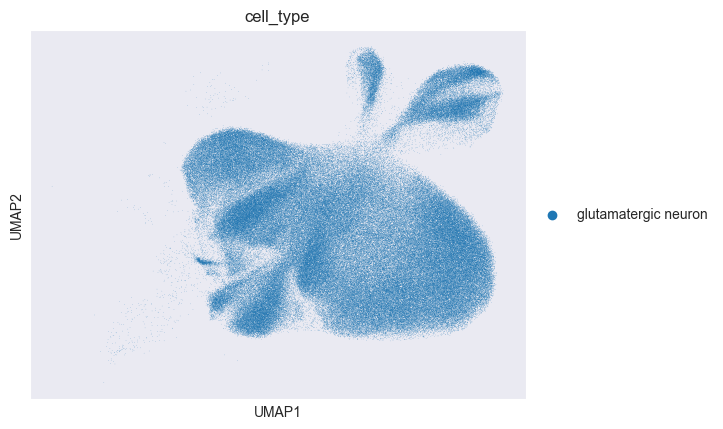

In [3]:
# Plot the cell population based on cell type

sc.pl.umap(adata, color=['cell_type'])

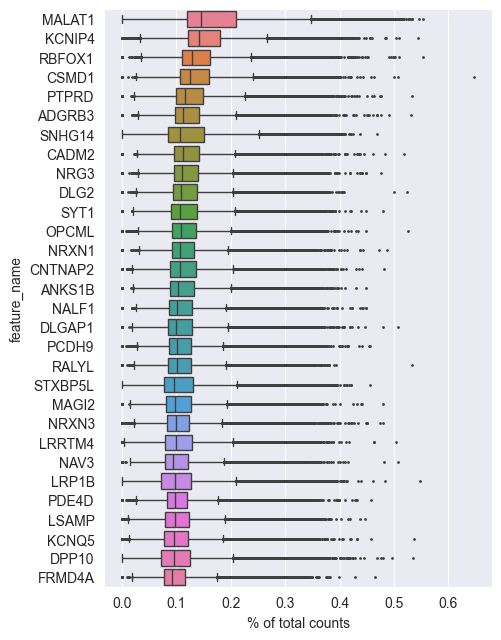

In [4]:
genes = sc.pl.highest_expr_genes(adata, gene_symbols="feature_name")

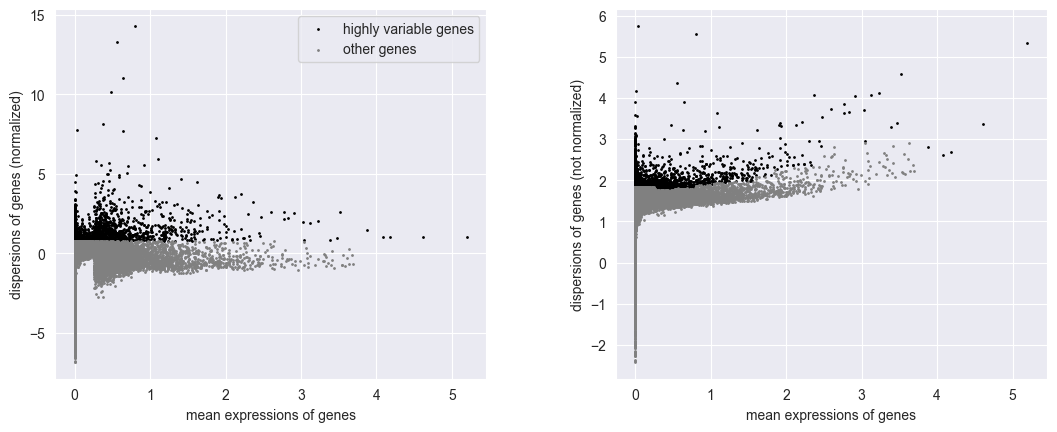

In [5]:
sc.pp.highly_variable_genes(adata, n_top_genes=5000)
sc.pl.highly_variable_genes(adata)

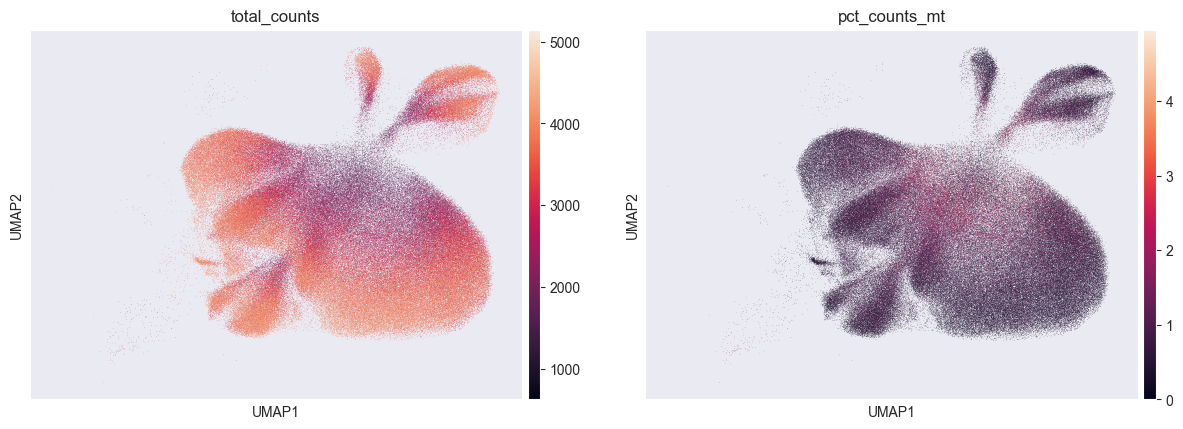

In [6]:
sc.pl.umap(
    adata,
    color=["total_counts", "pct_counts_mt"],
)

In [7]:
adata

AnnData object with n_obs × n_vars = 282930 × 61427
    obs: 'APOE_class', 'Brain.Region', 'SORT', 'Braak.stage', 'Disease.Group', 'Amyloid', 'Brain.weight', 'PMI.hr.', 'Race', 'Age', 'RIN', 'total_counts', 'pct_counts_mt', 'droplet_FDR', 'doublefinder', 'n_genes', 'sample', 'tissue_ontology_term_id', 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'development_stage_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'disease_ontology_term_id', 'sex_ontology_term_id', 'is_primary_data', 'suspension_type', 'donor_id', 'Age_group', 'PMI_group', 'RIN_group', 'Major_celltypes', 'Author_Annotation', 'NP.Diagonis', 'tissue_type', 'cell_type', 'assay', 'disease', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'mt', 'ribo', 'hb', 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature_length', 'feature_type', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Author_Annotati

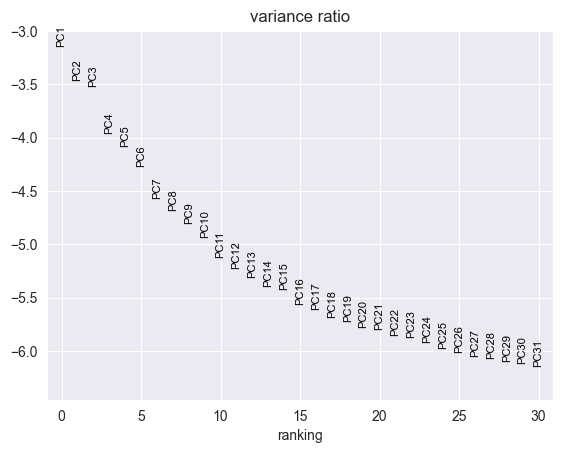

In [8]:
sc.tl.pca(adata, svd_solver='arpack', mask_var = "highly_variable")
sc.pl.pca_variance_ratio(adata, log=True)

In [9]:
adata_hvg = adata[:, adata.var['highly_variable']]
adata_hvg.var_names = adata_hvg.var["feature_name"]

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/anndata/_core/anndata.py:854: UserWarning: 
AnnData expects .var.index to contain strings, but got values like:
    ['ENSG00000284739', 'ENSG00000284694', 'ENSG00000230021', 'MTCYBP45', 'CA6']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "var")


In [10]:
sc.pp.neighbors(adata_hvg, n_pcs=25)
sc.tl.umap(adata_hvg)

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
sc.tl.leiden(adata_hvg, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata_hvg, key_added="leiden_res0_5", resolution=0.5)
sc.tl.leiden(adata_hvg, key_added="leiden_res1", resolution=1.0)

/var/folders/m0/5342p_s55313vrcn64gwp8t80000gn/T/ipykernel_10546/2803219699.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg, key_added="leiden_res0_25", resolution=0.25)


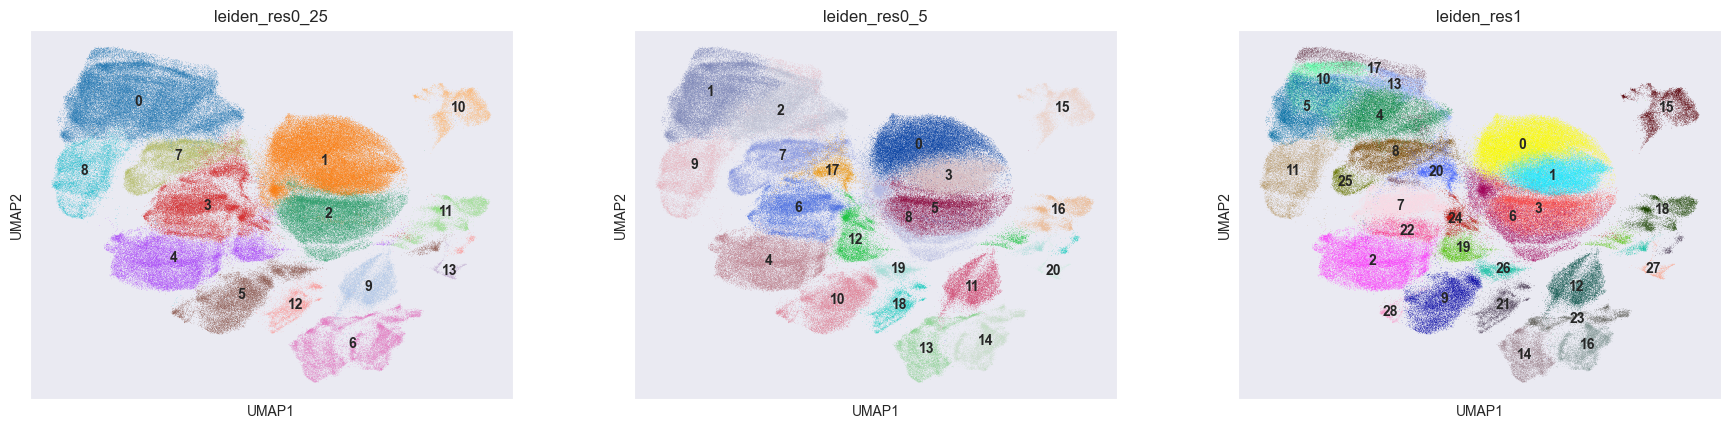

In [13]:
sc.pl.umap(
    adata_hvg,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

In [16]:
sc.tl.rank_genes_groups(adata_hvg, 'leiden_res0_5', method='wilcoxon', pts=True)

/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:456: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "names"] = self.var_names[global_indices]
/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/lib/python3.13/site-packages/scanpy/tools/_rank_genes_groups.py:458: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, "scores"] = scores[global_indices]
/Users/shaunak/PycharmProjects/Single_Cell_Alzheimers/.venv/l

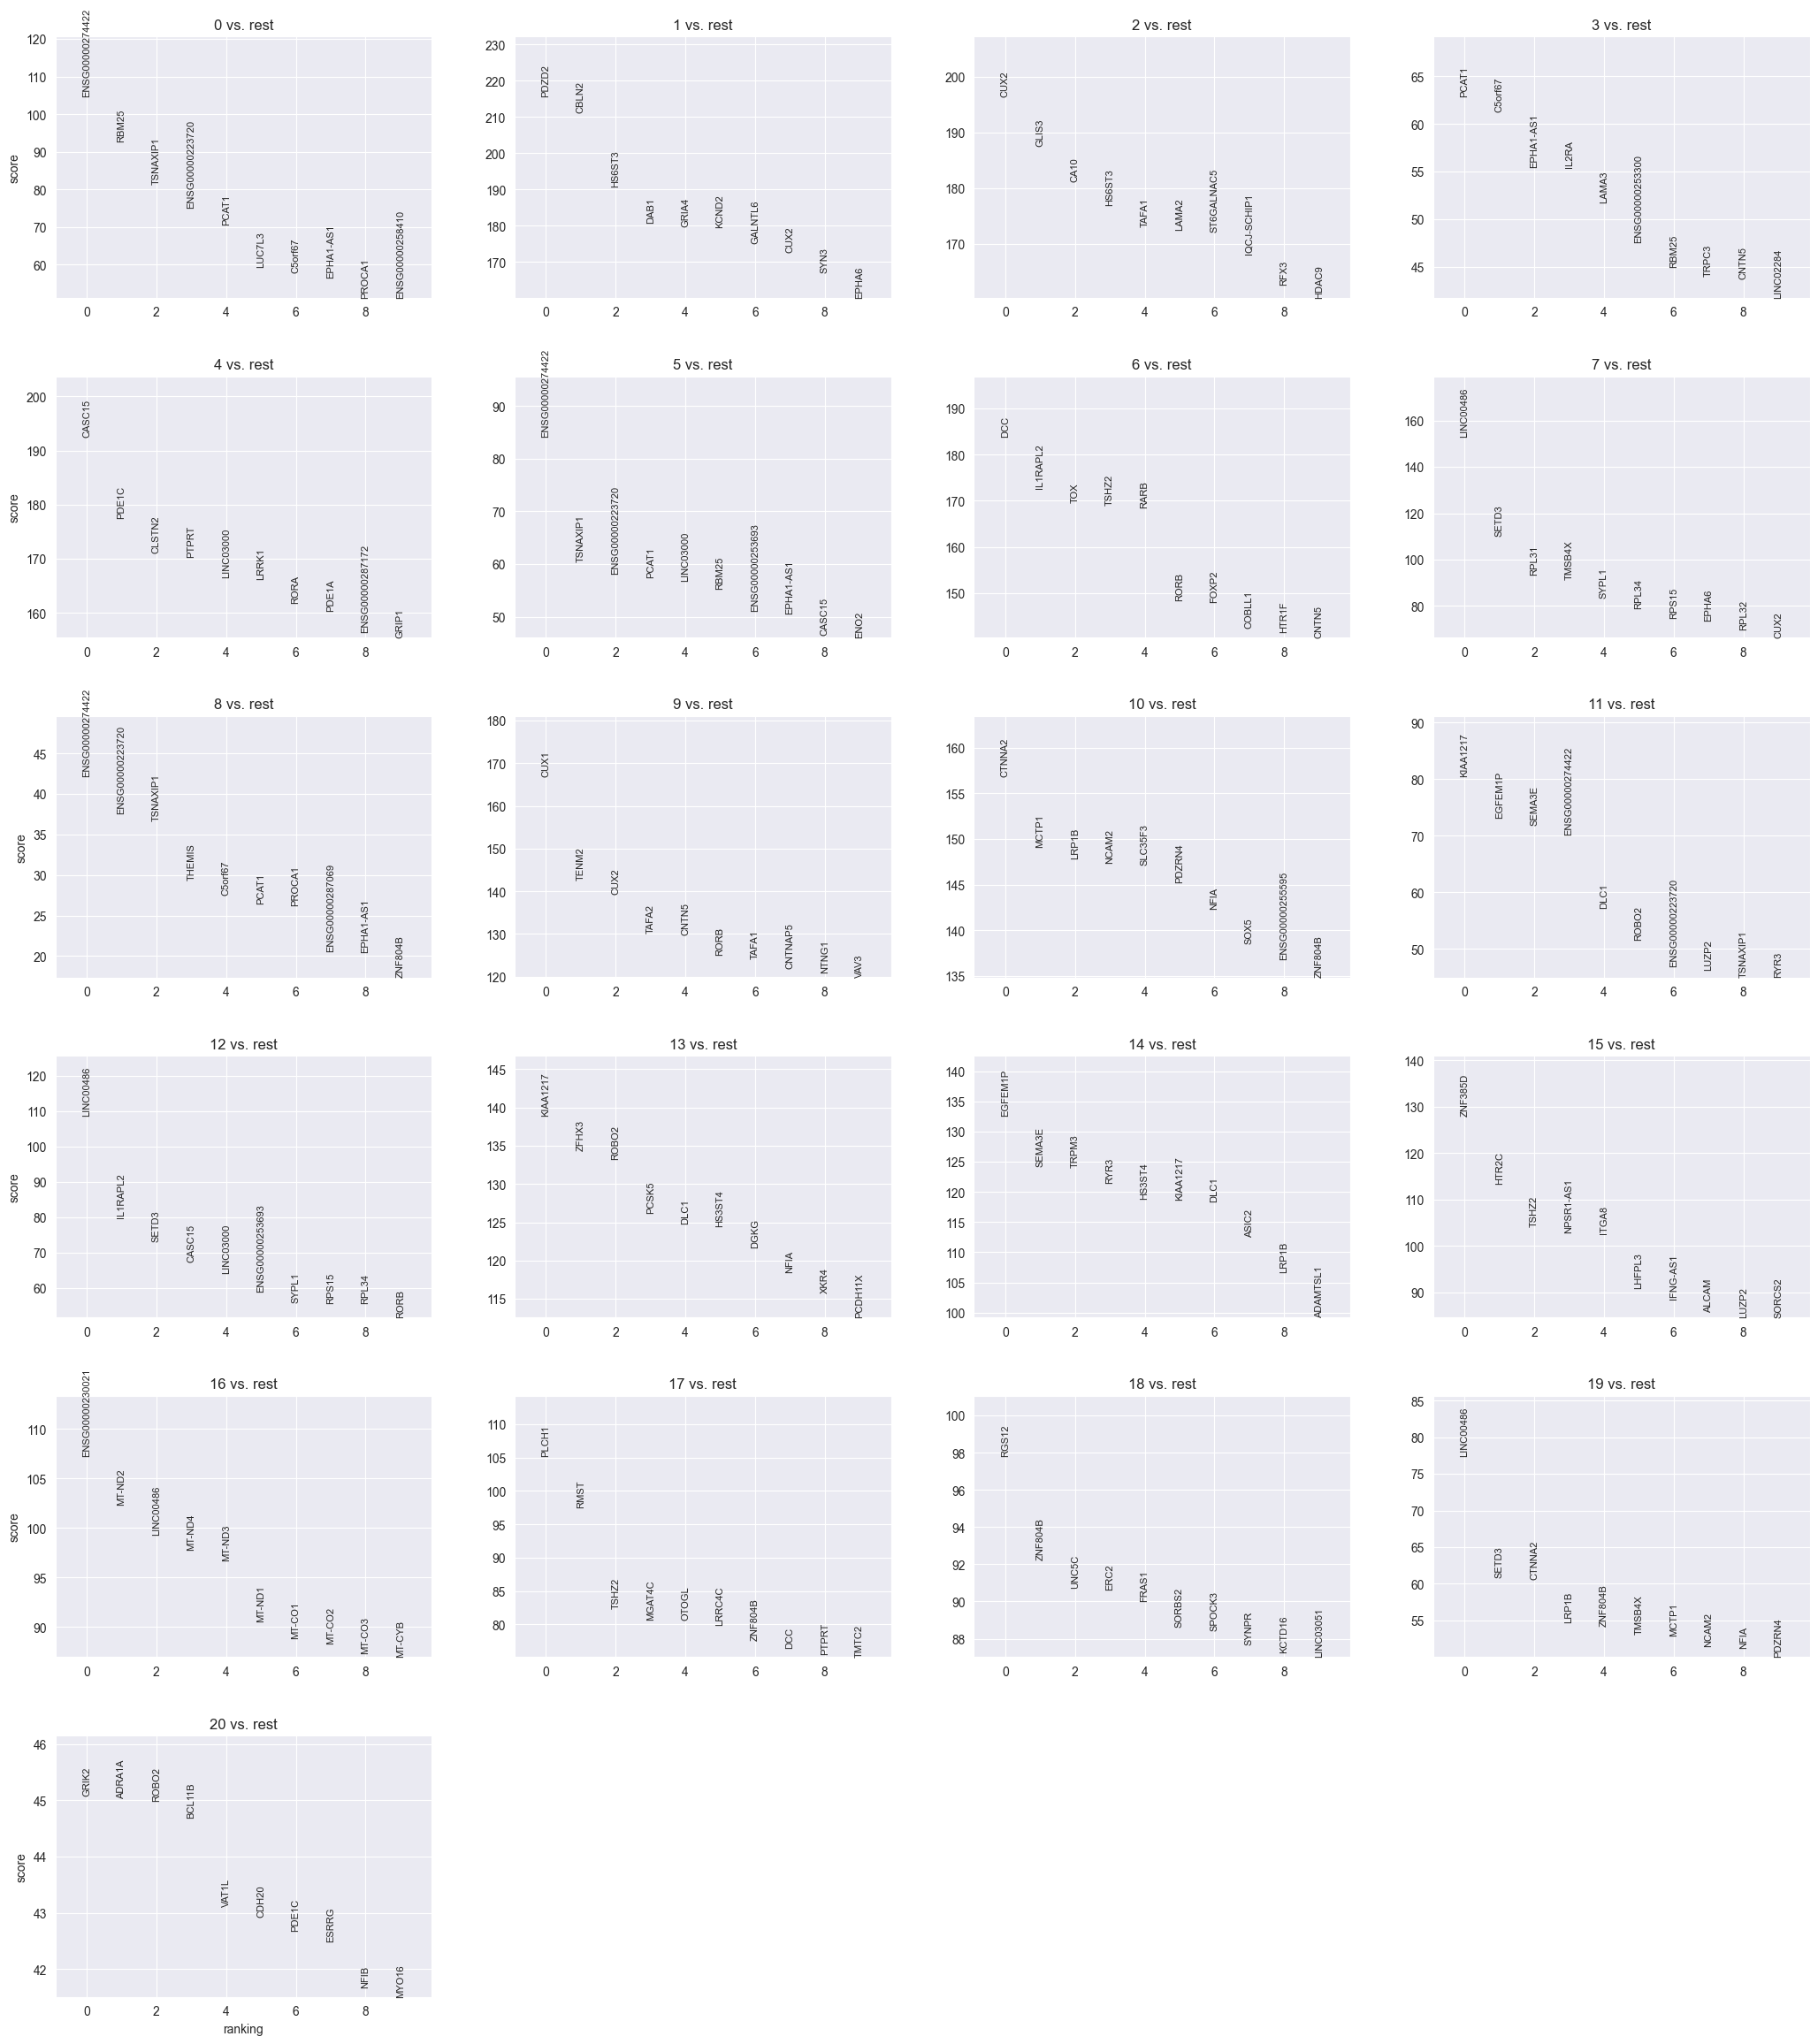

In [106]:
sc.pl.rank_genes_groups(adata_hvg, n_genes=10, sharey=False, gene_symbols="feature_name")

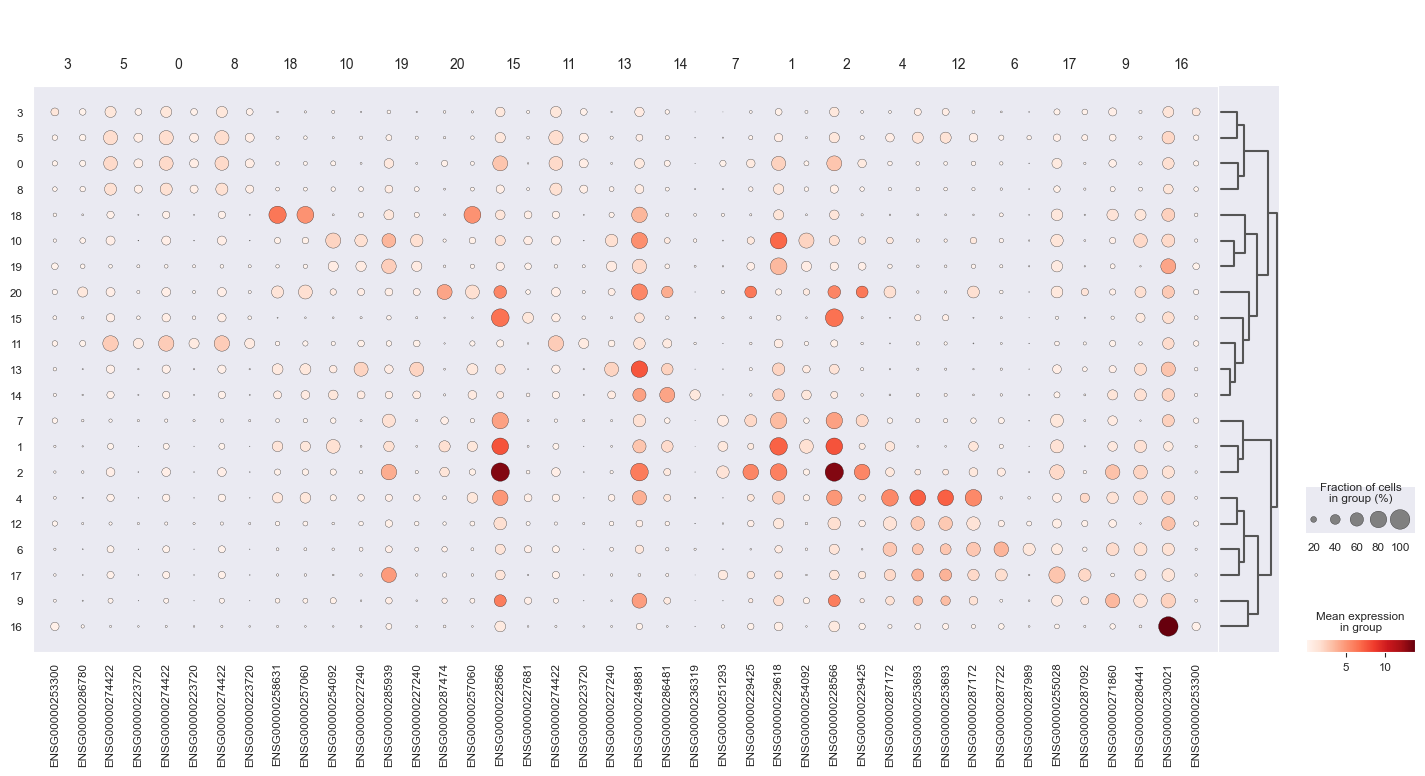

In [105]:
sc.pl.rank_genes_groups_dotplot(adata_hvg, n_genes=3, gene_symbols="feature_name")

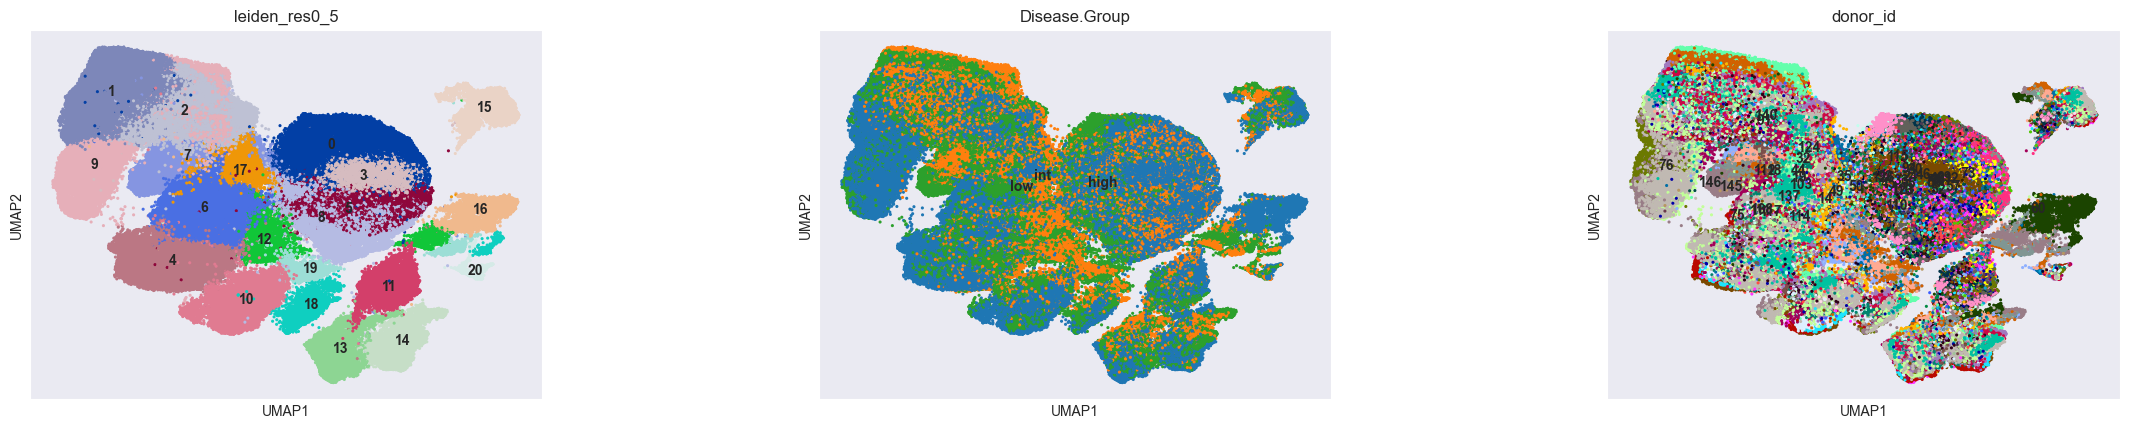

In [96]:
sc.pl.umap(adata_hvg, color=['leiden_res0_5', "Disease.Group", "donor_id"], wspace=0.4, size=20, legend_loc="on data")

In [93]:
import scipy.stats as stats
import pandas as pd
from scipy.stats import fisher_exact

ct = pd.crosstab(adata_hvg.obs["leiden_res0_5"], adata_hvg.obs["Disease.Group"])

pvals = {}
for c in ct.index:
    a = ct.loc[c,'low']
    b = ct.loc[c].sum() - a
    c_ = ct['low'].sum() - a
    d = ct.values.sum() - (a+b+c_)
    pvals[c] = fisher_exact([[a,b],[c_,d]])[1]

In [94]:
pvals

{'0': np.float64(0.0),
 '1': np.float64(2.0086829059813836e-116),
 '2': np.float64(5.133051257034421e-70),
 '3': np.float64(0.0),
 '4': np.float64(1.168839300279367e-44),
 '5': np.float64(0.0),
 '6': np.float64(6.397486658141453e-16),
 '7': np.float64(0.0),
 '8': np.float64(1.6662556088535242e-154),
 '9': np.float64(5.350030311293405e-139),
 '10': np.float64(0.3864291939287662),
 '11': np.float64(3.5153894932474197e-100),
 '12': np.float64(0.0),
 '13': np.float64(1.219466023192988e-57),
 '14': np.float64(7.736886623400983e-51),
 '15': np.float64(2.4406708012438876e-09),
 '16': np.float64(0.0),
 '17': np.float64(2.8238405474476427e-25),
 '18': np.float64(9.462573844700799e-42),
 '19': np.float64(0.0),
 '20': np.float64(7.1067731292226044e-09)}

In [99]:
ct

Disease.Group,high,int,low
leiden_res0_5,,,
0,16128,9336,7324
1,11447,12124,8599
2,7896,7982,9443
3,11917,5659,4658
4,7081,6554,7877
5,10119,6081,4163
6,5853,5796,6280
7,62,5097,10258
8,7083,3618,3072


In [88]:
ct.idxmax(axis=1)

leiden_res0_5
0     high
1      int
2      low
3     high
4      low
5     high
6      low
7      low
8     high
9     high
10    high
11    high
12     low
13     low
14     low
15     low
16    high
17     low
18     low
19     low
20     low
dtype: category
Categories (3, object): ['high', 'int', 'low']

In [98]:
# Find a low cluster
len(ct.idxmax(axis=1)[ct.idxmax(axis=1) == "low"])

12